In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from copy import copy
import os
import numpy as np
import re

In [2]:
from pandas import ExcelWriter
from pandas import ExcelFile
from numpy import savetxt
from bs4 import BeautifulSoup
import requests

In [3]:
import openpyxl
import xlrd

In [4]:
from collections import Counter

In [5]:
'''For visualization'''
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.models import Legend
from bokeh.io import output_notebook
from bokeh.plotting import ColumnDataSource, figure, output_file, show
from bokeh.transform import factor_cmap
import plotly
import plotly.express as px
import plotly.graph_objects as go

# AMOUNT OF WOMEN-MEN IN ESTAFETA SECTION

In [21]:
# df_estafeta = pd.read_excel('Estafeta.xlsx', sheet_name="Estafeta", engine='openpyxl')
df_estafeta = pd.read_excel('Estafeta.xlsx', engine='openpyxl')
df_estafeta.shape

(1167, 13)

In [22]:
df_estafeta

,Issue No.,Day,Month,Year,First Name,Last Name,Sex,Place,Editor's Response,Notes/comments/special interest,Additional comments,Unnamed: 11,Unnamed: 12
0,3,19,Aug,1926.0,Eduardo,Martínez,M,Ciudad,Thanks readers for their elogios,NaN,NaN,NaN,NaN
1,3,19,Aug,1926.0,Agustín,Delgado,M,Ciudad,Thanks readers for their elogios,NaN,NaN,NaN,NaN
2,3,19,Aug,1926.0,Roberto,Barros,M,Ciudad,Thanks readers for their elogios,NaN,NaN,NaN,NaN
3,3,19,Aug,1926.0,C.,Puertas de Raldo,?,Bilbao,Take note of the reader's petición and will be...,NaN,NaN,NaN,NaN
4,3,19,Aug,1926.0,Pito,NaN,?,Ciudad,Thanks readers for their suggestions and their...,Readers are sending ideas/articles/suggestions,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,175,NaN,NaN,NaN,M.M.M.,NaN,?,Not listed,NaN,NaN,NaN,NaN,NaN
1163,175,NaN,NaN,NaN,P.G.,NaN,M,Not listed,NaN,NaN,NaN,NaN,NaN
1164,175,NaN,NaN,NaN,Lolita,NaN,F,Not listed,NaN,NaN,NaN,NaN,NaN
1165,175,NaN,NaN,NaN,El lobo,NaN,?,Not listed,NaN,NaN,NaN,NaN,NaN


In [23]:
df_gender_per_issue = df_estafeta[['Issue No.', 'Sex']]

In [24]:
for index, row in df_gender_per_issue.iterrows():
    if isinstance(row['Issue No.'], int) == False:
        df_gender_per_issue.drop(index, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
df_gender_per_issue.shape

(1135, 2)

In [26]:
for index, row in df_gender_per_issue.iterrows():
    if row['Sex'] == '?':
        df_gender_per_issue.drop(index, inplace=True)
    if row['Sex'] == ' ?':
        df_gender_per_issue.drop(index, inplace=True)
    if row['Sex'] == '?.':
        df_gender_per_issue.drop(index, inplace=True)
    if row['Sex'] == '? ':
        df_gender_per_issue.drop(index, inplace=True)    
    if row['Sex'] == 'F?':
        df_gender_per_issue.drop(index, inplace=True)
    if row['Sex'] == 'M?':
        df_gender_per_issue.drop(index, inplace=True)
    if row['Sex'] == 'M & M':
        df_gender_per_issue.drop(index, inplace=True)


In [27]:
df_gender_per_issue.shape

(909, 2)

In [28]:
df_gender_per_issue = df_gender_per_issue.dropna(subset=['Issue No.', 'Sex'])  

In [29]:
df_gender_per_issue.groupby("Sex").count()

,Issue No.
Sex,
F,152
M,754


In [30]:
articles_2_sex_distribution = {}
for uniq_article in df_gender_per_issue['Issue No.'].unique():
    articles_2_sex_distribution[uniq_article] = Counter(df_gender_per_issue['Sex'][df_gender_per_issue['Issue No.'] == uniq_article])

In [31]:
df_gender = pd.DataFrame(articles_2_sex_distribution, columns = list(articles_2_sex_distribution.keys())).fillna(0)

In [32]:
men = []
women = []
for index, row in df_gender.iterrows():
    if index == 'M':
        men = list(row)
    if index == 'F':
        women = list(row)

issues_number = list(articles_2_sex_distribution.keys())

In [33]:
df_gender[26]

M    62
F     5
Name: 26, dtype: int64

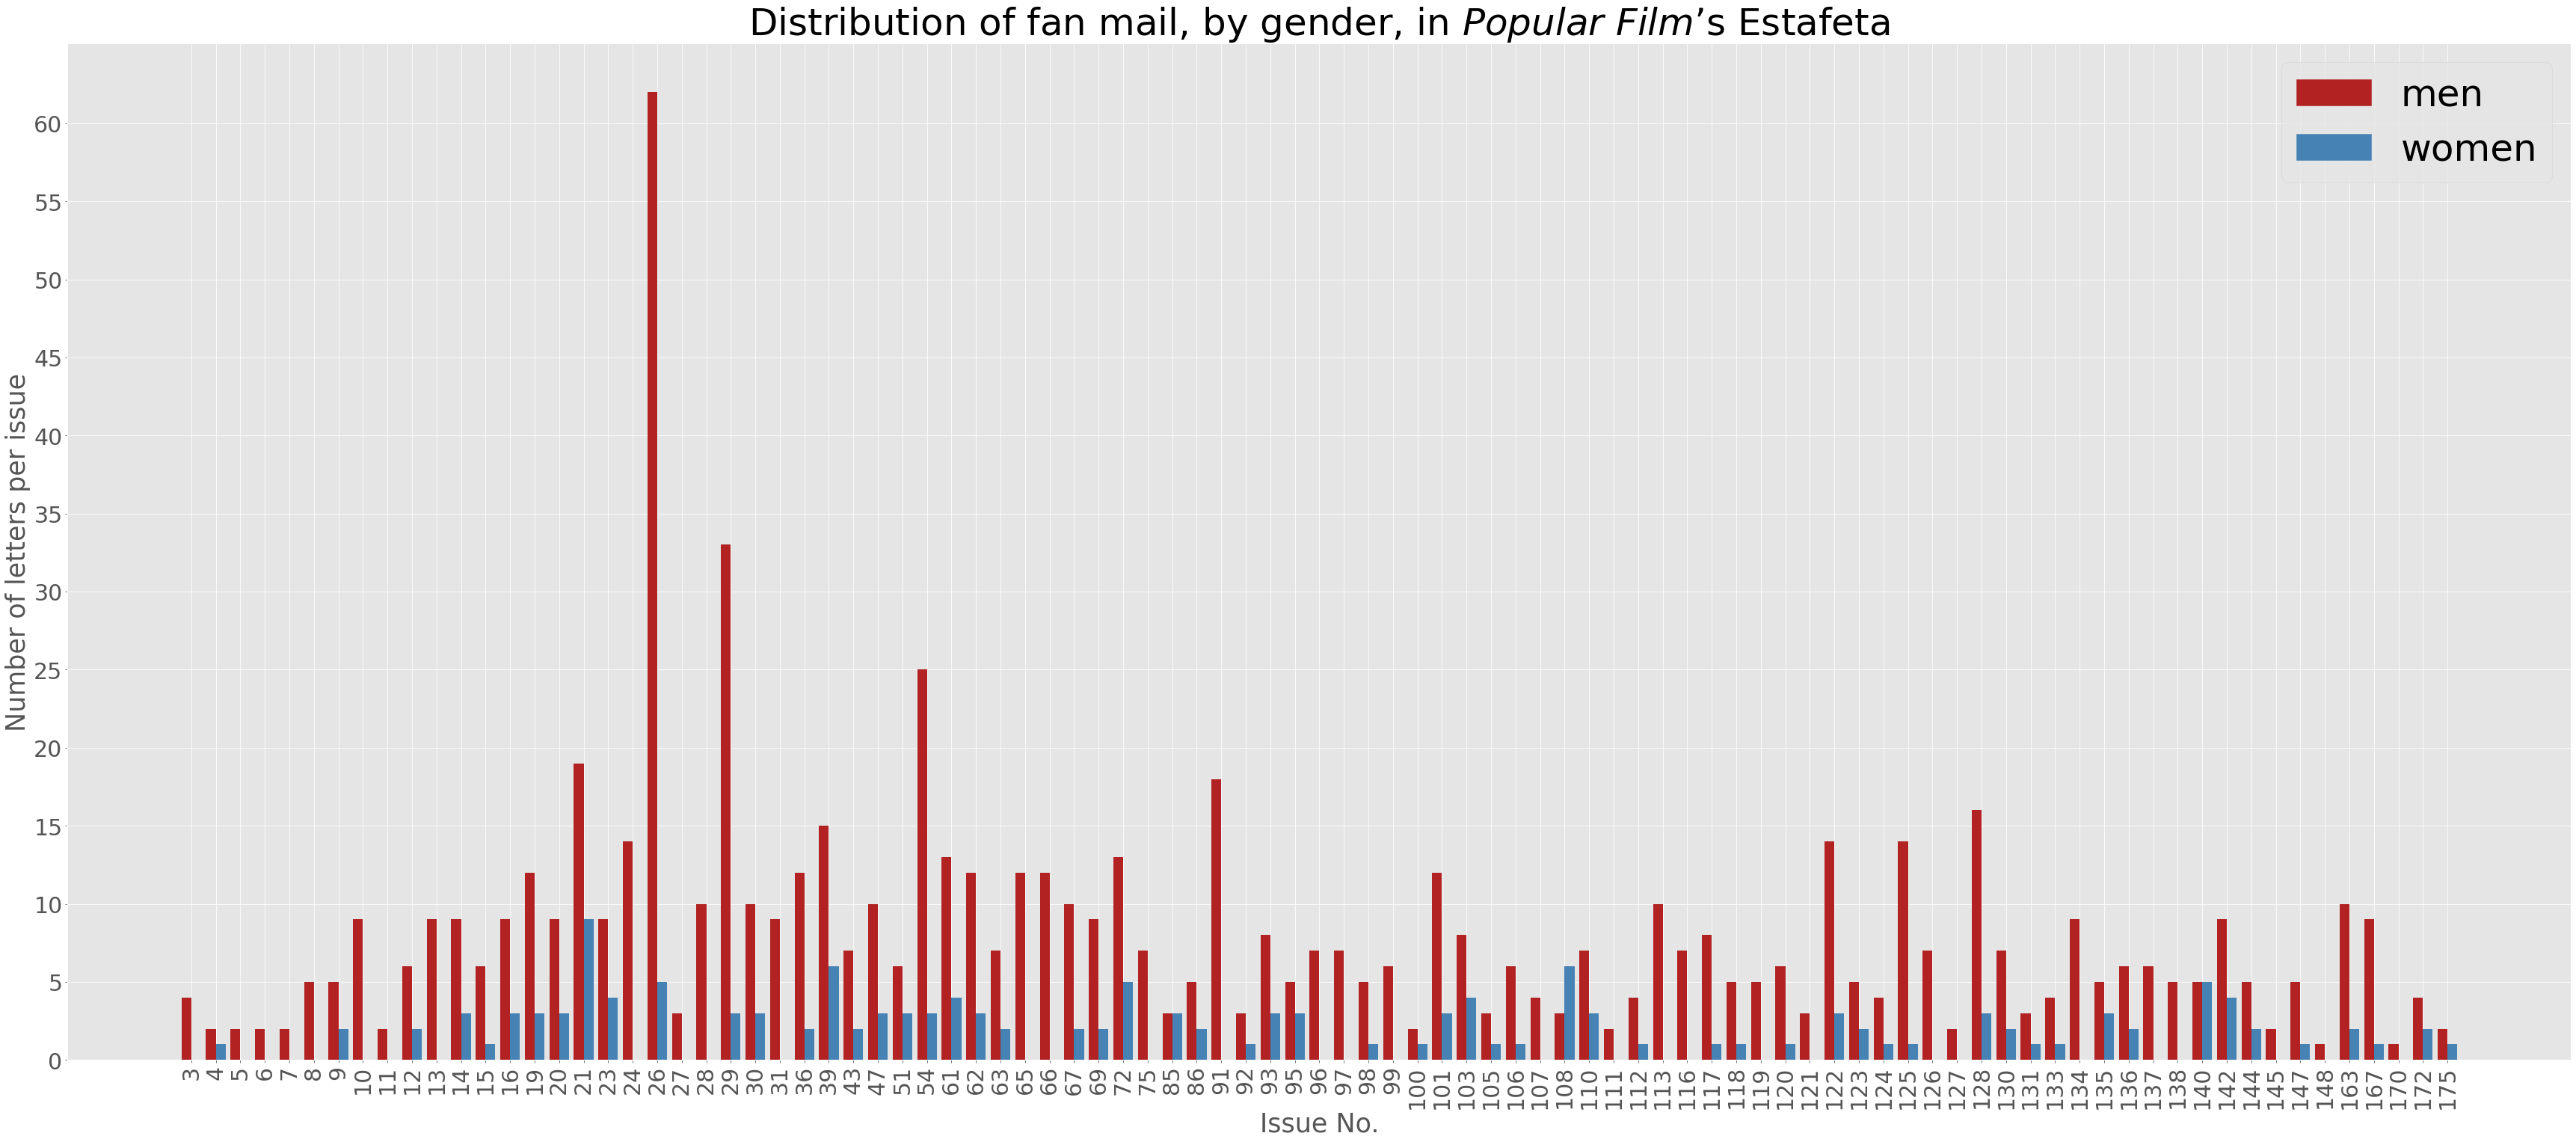

In [34]:
fig = plt.figure(figsize=(60,25))


plt.bar(np.arange(0, len(issues_number)) - 0.2, men, width=0.4, color='firebrick')
plt.bar(np.arange(0, len(issues_number)) + 0.2, women, width= 0.4, label='Women', color = 'steelblue')
plt.style.use('ggplot')
plt.xticks(np.arange(0, len(issues_number)),issues_number[::1], fontsize=30, rotation = 90)
plt.yticks(range(0, 65, 5), fontsize=30)

blue_patch = mpatches.Patch(color='steelblue', label='women')
red_patch =  mpatches.Patch(color='firebrick', label='men')
plt.legend(handles=[red_patch, blue_patch], loc='upper right', prop={"size":50})

plt.xlabel('Issue No.', fontsize=35)
plt.ylabel('Number of letters per issue', fontsize=35)
plt.title("Distribution of fan mail, by gender, in $\it{Popular}$ $\it{Film’}$s Estafeta", fontsize = 50)

plt.savefig('Distribution_of_mail_by_gender.pdf', bbox_inches='tight')

plt.show()


## The same code, but with "Unknown" gender

In [36]:
df_gender_per_issue = df_estafeta[['Issue No.', 'Sex']]
for index, row in df_gender_per_issue.iterrows():
    if isinstance(row['Issue No.'], int) == False:
        df_gender_per_issue.drop(index, inplace=True)
df_gender_per_issue.shape

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1135, 2)

In [37]:
df_gender_per_issue.groupby("Sex").count()

,Issue No.
Sex,
?,226
F,152
M,754


In [144]:
articles_2_sex_distribution = {}
for uniq_article in df_gender_per_issue['Issue No.'].unique():
    articles_2_sex_distribution[uniq_article] = Counter(df_gender_per_issue['Sex'][df_gender_per_issue['Issue No.'] == uniq_article])
df_gender = pd.DataFrame(articles_2_sex_distribution, columns = list(articles_2_sex_distribution.keys())).fillna(0)

In [145]:
df_gender[26]

M      62.0
?      11.0
F       5.0
NaN     0.0
Name: 26, dtype: float64

In [146]:
men = []
women = []
unknown = []
for index, row in df_gender.iterrows():
    if index == 'M':
        men = list(row)
    if index == 'F':
        women = list(row)
    if index == '?':
        unknown = list(row)

issues_number = list(articles_2_sex_distribution.keys())

In [147]:
len(men)

93

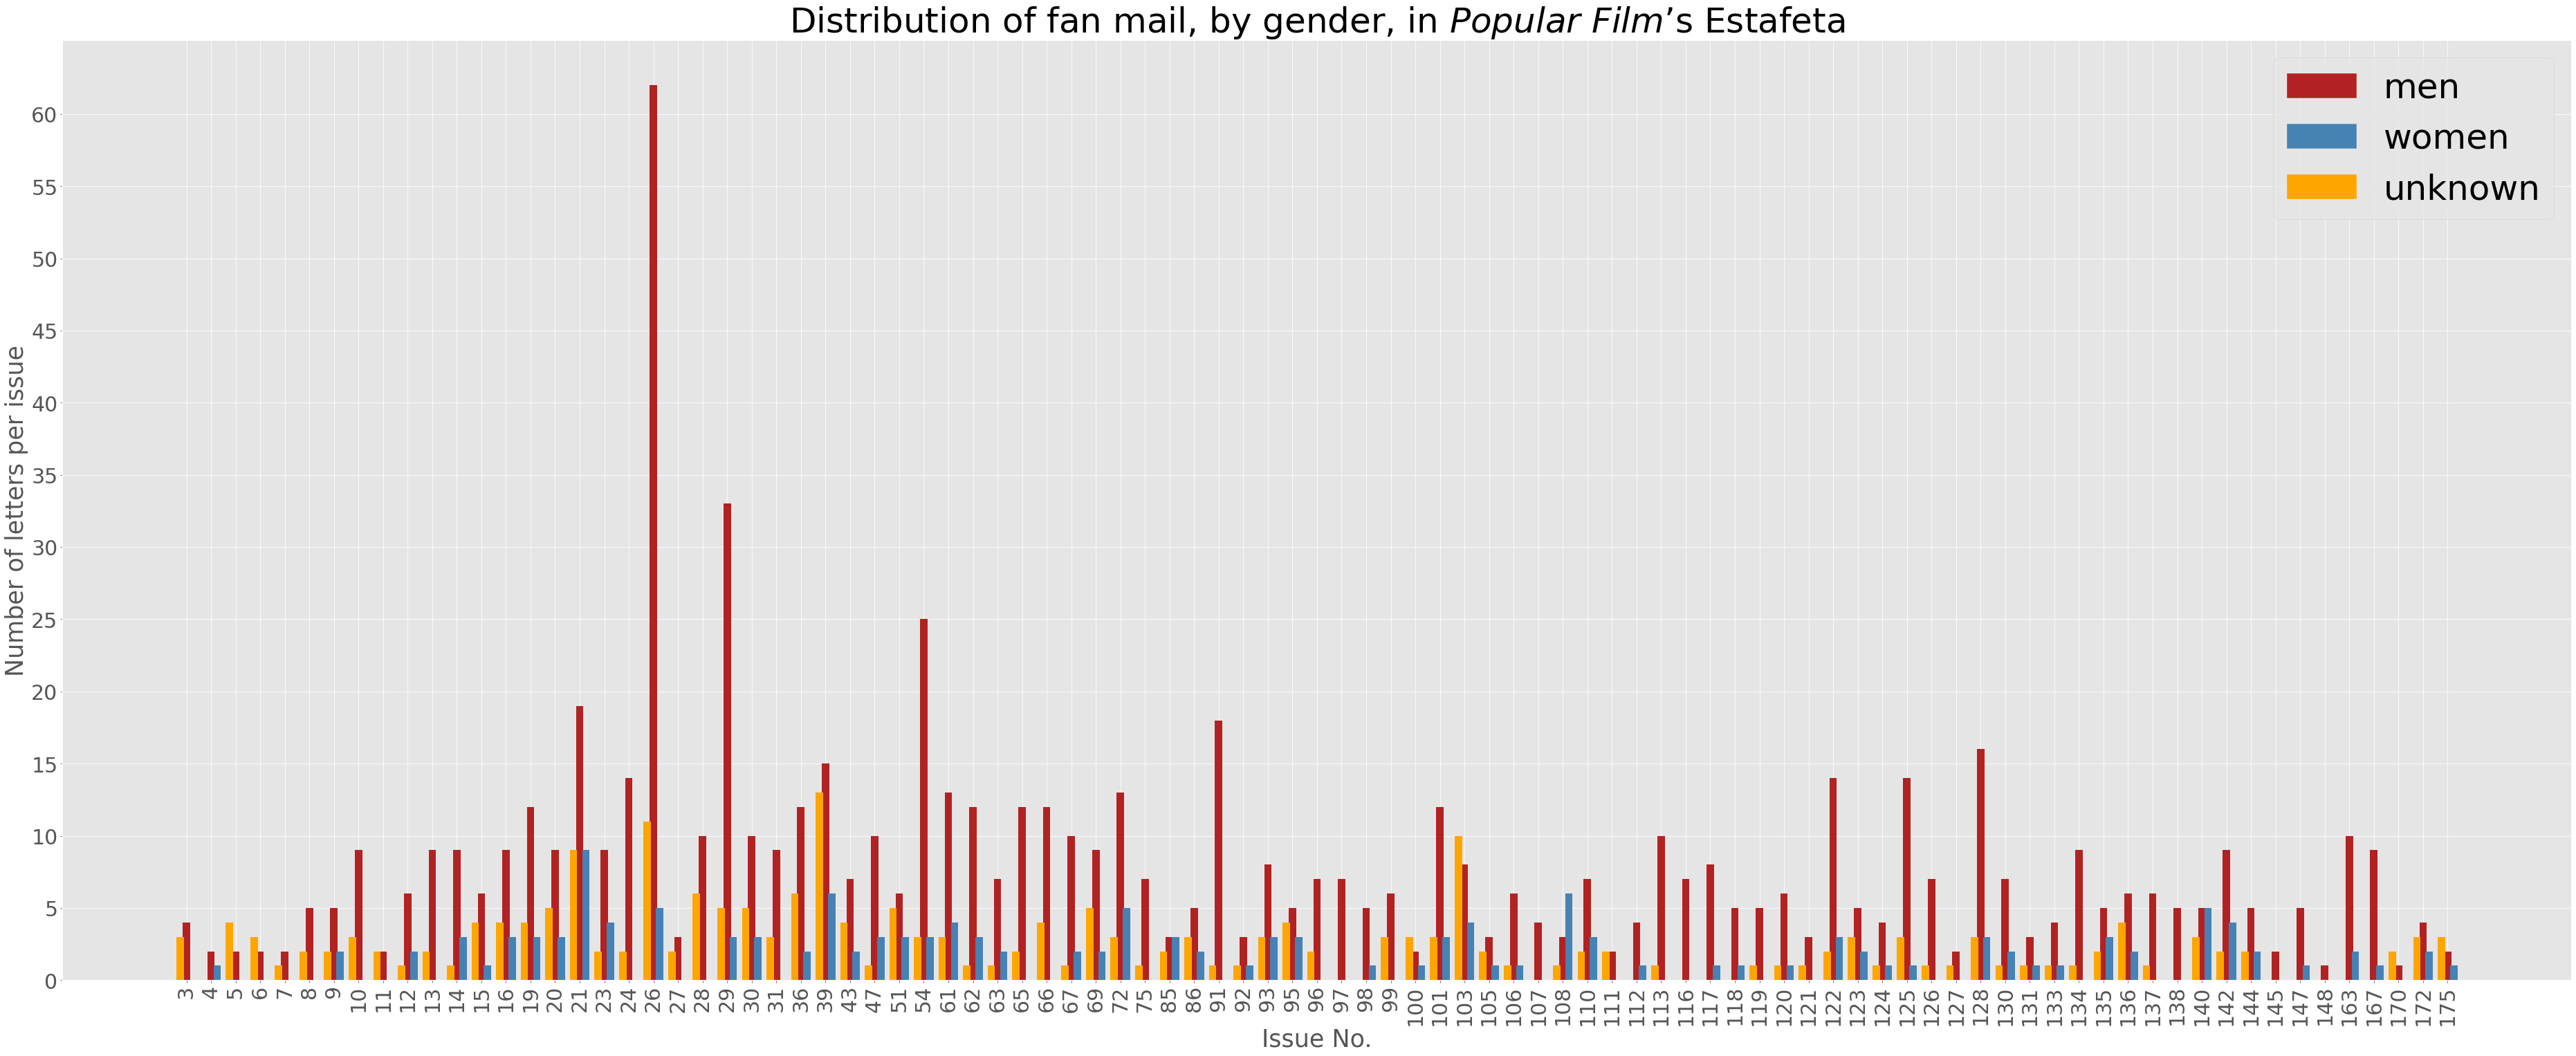

In [148]:
fig = plt.figure(figsize=(65,25))


plt.bar(np.arange(0, len(issues_number)) + 0.0, men, width=0.3, color='firebrick')
plt.bar(np.arange(0, len(issues_number)) + 0.25, women, width= 0.3, color = 'steelblue')
plt.bar(np.arange(0, len(issues_number)) - 0.25, unknown, width= 0.3, color = 'orange')
plt.style.use('ggplot')
plt.xticks(np.arange(0, len(issues_number)),issues_number[::1], fontsize=30, rotation = 90)
plt.yticks(range(0, 65, 5), fontsize=30)

red_patch = mpatches.Patch(color='firebrick', label='men')
blue_patch =  mpatches.Patch(color='steelblue', label='women')
green_patch =  mpatches.Patch(color='orange', label='unknown')
plt.legend(handles=[red_patch, blue_patch, green_patch], loc='upper right', prop={"size":50})

plt.xlabel('Issue No.', fontsize=35)
plt.ylabel('Number of letters per issue', fontsize=35)
plt.title("Distribution of fan mail, by gender, in $\it{Popular}$ $\it{Film’}$s Estafeta", fontsize = 50)


plt.savefig('Distribution_of_fan_mail_by_gender.pdf', bbox_inches='tight')
plt.show()

# RESUME & PHOTOS

## Preparation of Data

In [75]:
df_photos = pd.read_excel('Tengo condiciones de ser artista de cine.xlsx', engine='openpyxl')
df_photos.shape

(234, 11)

In [76]:
df_photos

,Issue No.,Day,Month,Year,Nombre de concursante,Sex,Age,Height (in m),Weight (kilos),Hobbies,Comments
0,17,22,Nov,1926,Manuel Bernal de los Santos,M,12.0,NaN,NaN,NaN,NaN
1,18,2,Dec,1926,Bernardino Alonso del Olmo,M,14.0,NaN,NaN,NaN,NaN
2,20,16,Dec,1926,Juan Faidella Jufré,M,18.0,1710,70,"Futbol, natación, equitación, boxeo y saltos d...",NaN
3,21,23,Dec,1926,Juan Alfredo Ulrich,M,20.0,"1, 740",68,"gimnasia, natación, baskett ball, boxeo",Posee conocimientos del teatro alemán.
4,21,23,Dec,1926,Maria Samaniego,F,10.0,1200,NaN,Full body photo,NaN
...,...,...,...,...,...,...,...,...,...,...,...
229,44,2,June,1927,Juan Jiménez Sánchez,M,23.0,NaN,NaN,NaN,NaN
230,44,2,June,1927,Licurgo Gallego,M,15.0,NaN,NaN,NaN,NaN
231,44,2,June,1927,Ferbiol Montseny,M,23.0,NaN,NaN,NaN,NaN
232,44,2,June,1927,Manuel Baeza,M,15.0,NaN,NaN,NaN,NaN


In [77]:
df_photos = df_photos.drop(columns=['Hobbies', 'Comments'])
df_photos['Month'] = [month.strip() for month in df_photos['Month']]
m={
    'Jan': 1, 
    'Feb': 2, 
    'March': 3, 
    'April': 4,
    'May': 5, 
    'June': 6,
    'July': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
} 
df_photos.Month = df_photos.Month.map(m)

In [78]:
df_photos

,Issue No.,Day,Month,Year,Nombre de concursante,Sex,Age,Height (in m),Weight (kilos)
0,17,22,11,1926,Manuel Bernal de los Santos,M,12.0,NaN,NaN
1,18,2,12,1926,Bernardino Alonso del Olmo,M,14.0,NaN,NaN
2,20,16,12,1926,Juan Faidella Jufré,M,18.0,1710,70
3,21,23,12,1926,Juan Alfredo Ulrich,M,20.0,"1, 740",68
4,21,23,12,1926,Maria Samaniego,F,10.0,1200,NaN
...,...,...,...,...,...,...,...,...,...
229,44,2,6,1927,Juan Jiménez Sánchez,M,23.0,NaN,NaN
230,44,2,6,1927,Licurgo Gallego,M,15.0,NaN,NaN
231,44,2,6,1927,Ferbiol Montseny,M,23.0,NaN,NaN
232,44,2,6,1927,Manuel Baeza,M,15.0,NaN,NaN


In [79]:
pd.to_datetime(df_photos[["Year", "Month", "Day"]])
df_photos['Date_time'] = pd.to_datetime(df_photos[["Year", "Month", "Day"]])
df_photos

,Issue No.,Day,Month,Year,Nombre de concursante,Sex,Age,Height (in m),Weight (kilos),Date_time
0,17,22,11,1926,Manuel Bernal de los Santos,M,12.0,NaN,NaN,1926-11-22
1,18,2,12,1926,Bernardino Alonso del Olmo,M,14.0,NaN,NaN,1926-12-02
2,20,16,12,1926,Juan Faidella Jufré,M,18.0,1710,70,1926-12-16
3,21,23,12,1926,Juan Alfredo Ulrich,M,20.0,"1, 740",68,1926-12-23
4,21,23,12,1926,Maria Samaniego,F,10.0,1200,NaN,1926-12-23
...,...,...,...,...,...,...,...,...,...,...
229,44,2,6,1927,Juan Jiménez Sánchez,M,23.0,NaN,NaN,1927-06-02
230,44,2,6,1927,Licurgo Gallego,M,15.0,NaN,NaN,1927-06-02
231,44,2,6,1927,Ferbiol Montseny,M,23.0,NaN,NaN,1927-06-02
232,44,2,6,1927,Manuel Baeza,M,15.0,NaN,NaN,1927-06-02


## Distribution of contestants, by gender, with No. of issue on the X Axis

In [80]:
df_gender = df_photos[['Issue No.', 'Sex']]
for index, row in df_gender.iterrows():
    if isinstance(row['Issue No.'], int) == False:
        df_gender.drop(index, inplace=True)
df_gender.shape

(234, 2)

In [81]:
df_gender

,Issue No.,Sex
0,17,M
1,18,M
2,20,M
3,21,M
4,21,F
...,...,...
229,44,M
230,44,M
231,44,M
232,44,M


In [82]:
articles_2_sex_distribution = {}
for uniq_article in df_gender['Issue No.'].unique():
    articles_2_sex_distribution[uniq_article] = Counter(df_gender['Sex'][df_gender['Issue No.'] == uniq_article])
df_gender = pd.DataFrame(articles_2_sex_distribution, columns = list(articles_2_sex_distribution.keys())).fillna(0)

In [83]:
df_gender

,17,18,20,21,22,23,24,25,26,27,...,35,36,37,38,39,40,41,42,43,44
M,1.0,1.0,1.0,1,1,5,5,4,5,6,...,8,8,8,8,9.0,14,16.0,16.0,16.0,10.0
F,0.0,0.0,0.0,1,1,4,4,5,4,3,...,1,1,1,1,0.0,2,0.0,0.0,0.0,0.0


In [84]:
men = []
women = []
for index, row in df_gender.iterrows():
    if index == 'M':
        men = list(row)
    if index == 'F':
        women = list(row)

issues_number = list(articles_2_sex_distribution.keys())

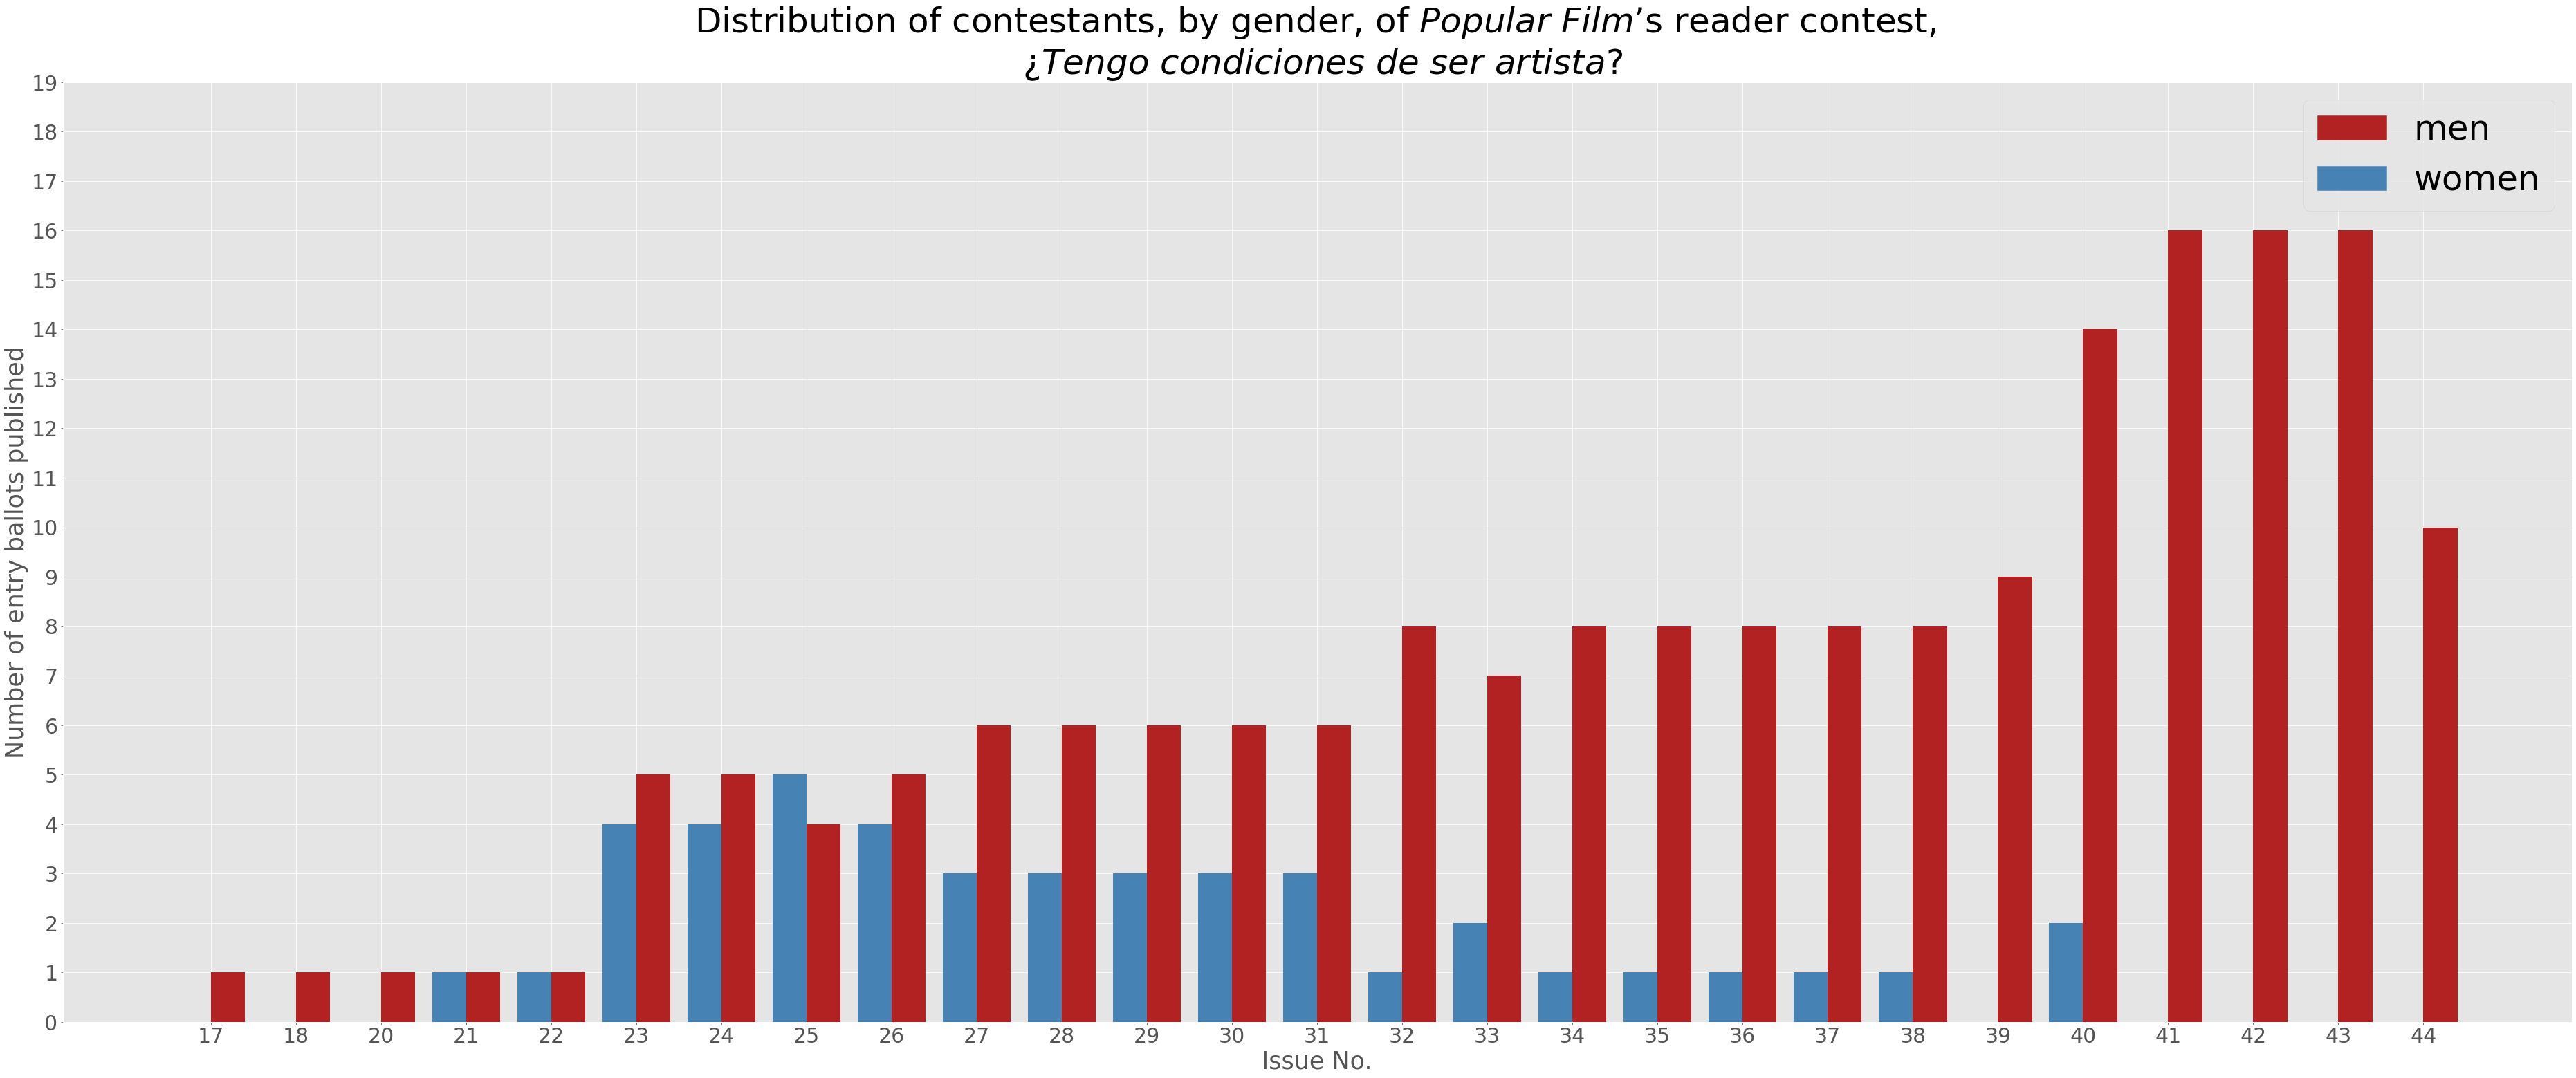

In [85]:
fig = plt.figure(figsize=(65,25))


plt.bar(np.arange(0, len(issues_number)) + 0.2, men, width=0.4, color='firebrick')
plt.bar(np.arange(0, len(issues_number)) - 0.2, women, width= 0.4, color = 'steelblue')

plt.style.use('ggplot')
plt.xticks(np.arange(0, len(issues_number)), issues_number[::1], fontsize=30)
plt.yticks(range(0, 20, 1), fontsize=30)

red_patch = mpatches.Patch(color='firebrick', label='men')
blue_patch =  mpatches.Patch(color='steelblue', label='women')
plt.legend(handles=[red_patch, blue_patch], loc='upper right', prop={"size":50})


plt.xlabel('Issue No.', fontsize=35)
plt.ylabel('Number of entry ballots published', fontsize=35)
plt.title("Distribution of contestants, by gender, of $\it{Popular}$ $\it{Film’}$s reader contest, \n $\it{¿Tengo}$ $\it{condiciones}$ $\it{de}$ $\it{ser}$ $\it{artista?}$", fontsize = 50)


plt.savefig('Distribution_of_contestants_by_gender.pdf', bbox_inches='tight')
plt.show()

## Distribution of contestants, by gender, with date of publication on the X Axis

In [86]:
df_gender = df_photos[['Sex', 'Date_time']]
df_gender = df_gender.dropna()

In [87]:
import time
import datetime

gender_by_date = {}
for uniq_day in df_gender['Date_time'].unique():
    gender_by_date[uniq_day] = Counter(df_gender['Sex'][df_gender['Date_time'] == uniq_day])
    
df_gender_date = pd.DataFrame(gender_by_date, columns = list(gender_by_date.keys())).fillna(0).T

dates = re.findall('\d{4}-\d{2}-\d{2}', str(df_gender_date.index))
dates

['1926-11-22',
 '1926-12-02',
 '1926-12-16',
 '1926-12-23',
 '1926-12-30',
 '1927-01-06',
 '1927-01-13',
 '1927-01-20',
 '1927-01-27',
 '1927-02-03',
 '1927-02-10',
 '1927-02-17',
 '1927-02-24',
 '1927-03-03',
 '1927-03-10',
 '1927-03-17',
 '1927-03-24',
 '1927-03-31',
 '1927-04-07',
 '1927-04-14',
 '1927-04-21',
 '1927-04-28',
 '1927-05-05',
 '1927-05-12',
 '1927-05-19',
 '1927-05-26',
 '1927-06-02']

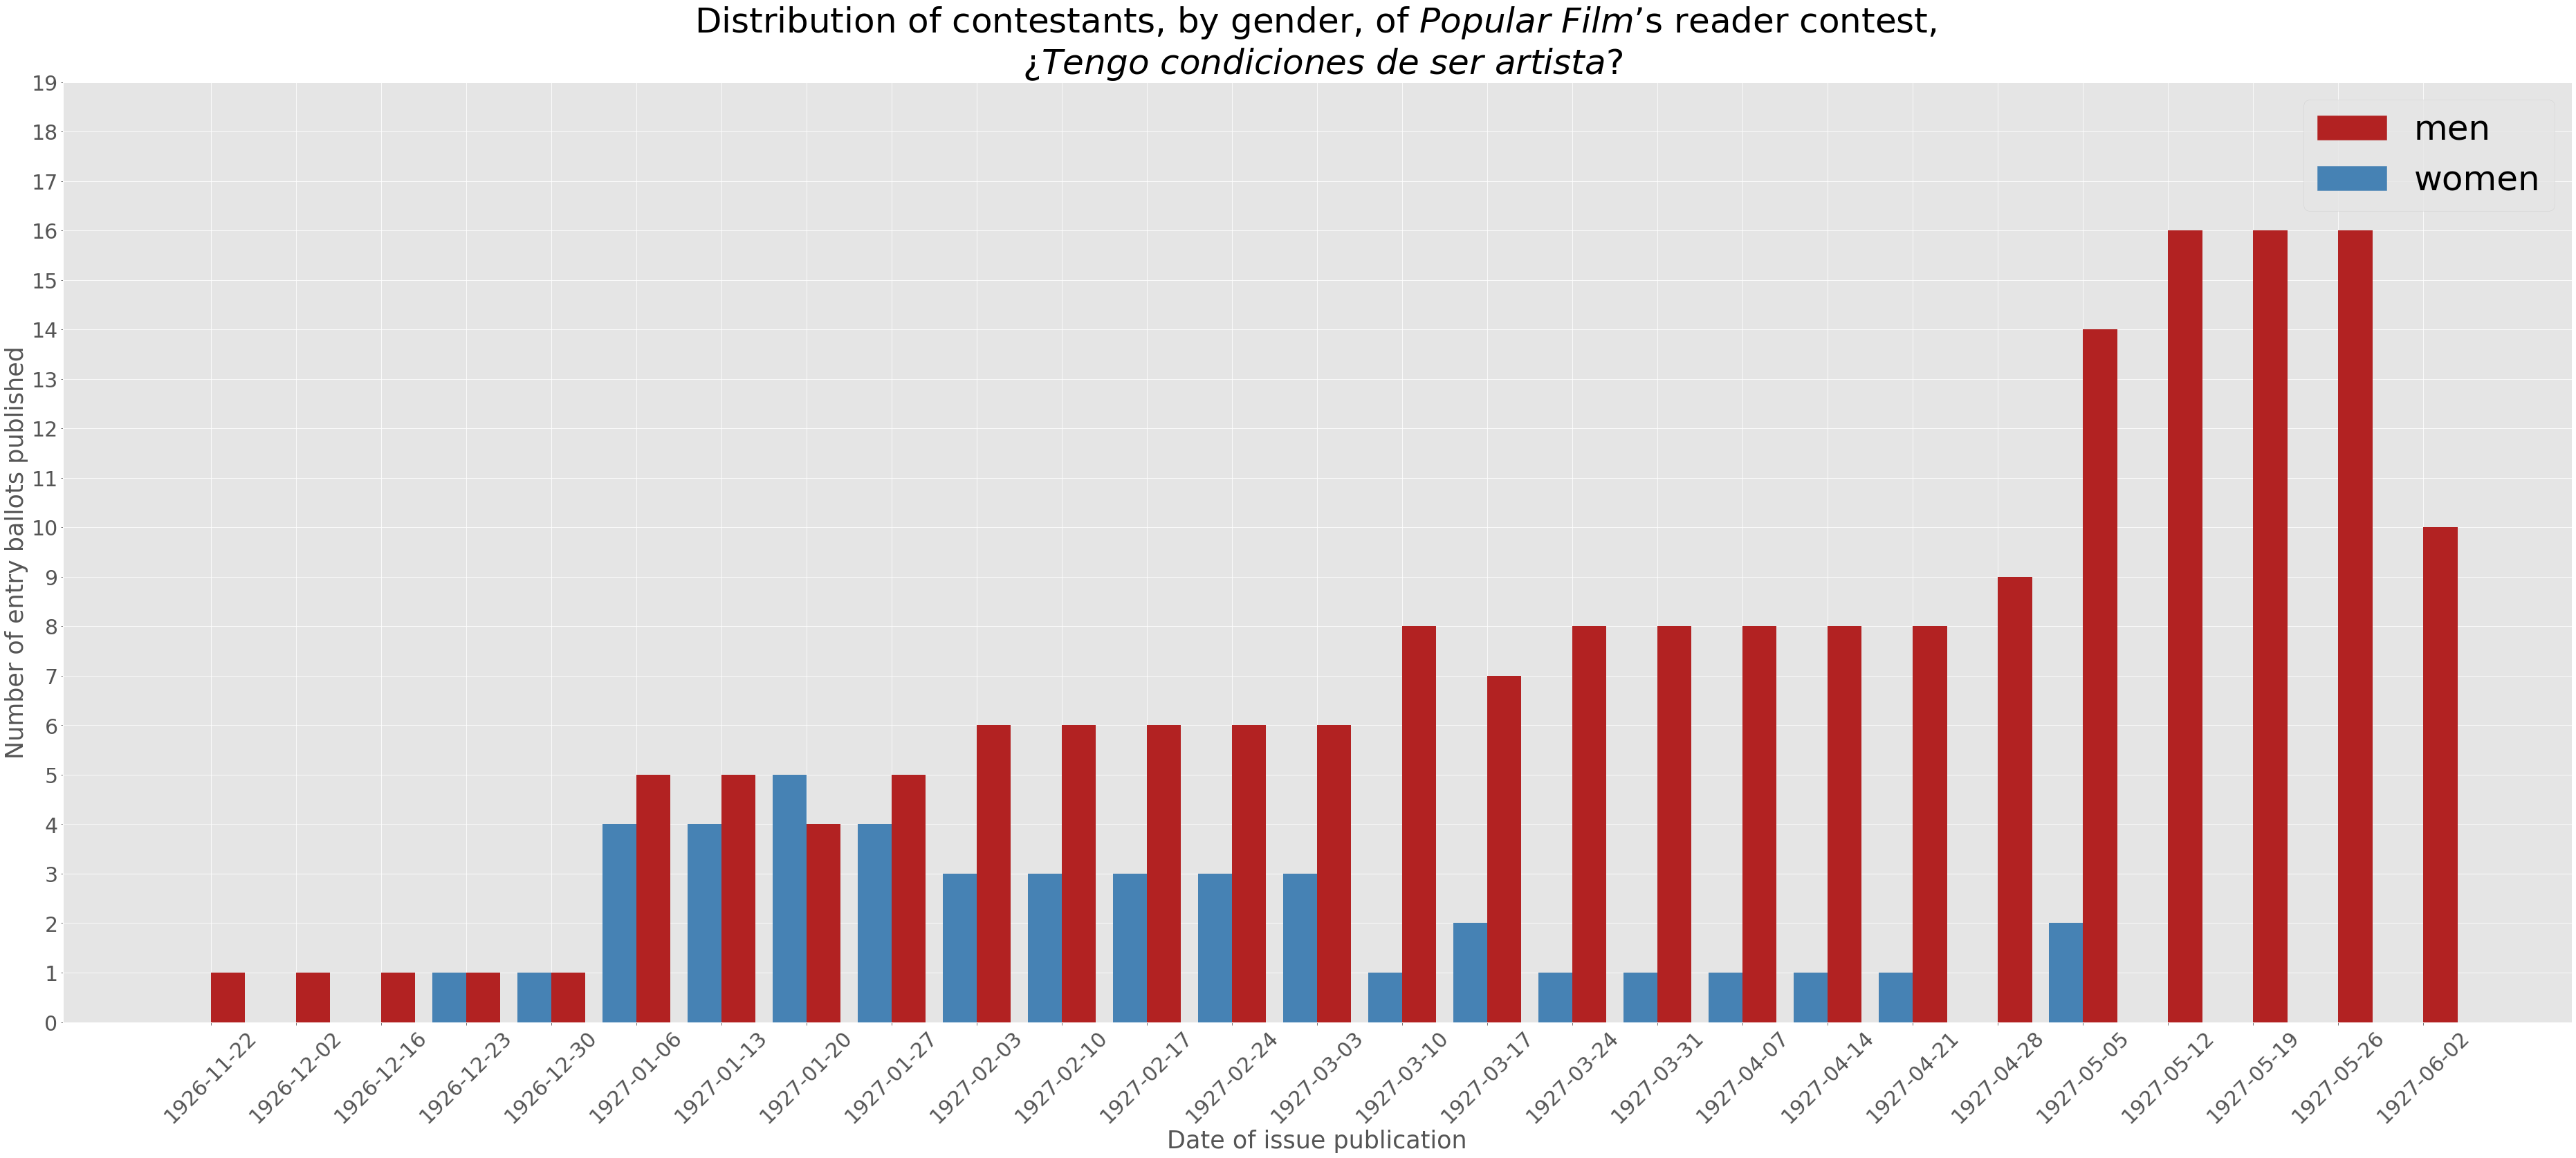

In [89]:
fig = plt.figure(figsize=(65,25))


plt.bar(np.arange(0, len(dates)) + 0.2, men, width=0.4, color='firebrick')
plt.bar(np.arange(0, len(dates)) - 0.2, women, width= 0.4, color = 'steelblue')

plt.style.use('ggplot')
plt.xticks(np.arange(0, len(dates)), dates[::1], rotation = 45, fontsize=30)
plt.yticks(range(0, 20, 1), fontsize=30)

red_patch = mpatches.Patch(color='firebrick', label='men')
blue_patch =  mpatches.Patch(color='steelblue', label='women')
plt.legend(handles=[red_patch, blue_patch], loc='upper right', prop={"size":50})


plt.xlabel('Date of issue publication', fontsize=35)
plt.ylabel('Number of entry ballots published', fontsize=35)
plt.title("Distribution of contestants, by gender, of $\it{Popular}$ $\it{Film’}$s reader contest, \n $\it{¿Tengo}$ $\it{condiciones}$ $\it{de}$ $\it{ser}$ $\it{artista?}$", fontsize = 50)


plt.savefig('Distribution_of_contestants_by_gender.pdf', bbox_inches='tight')
plt.show()

## Distribution of contestants, by age

In [90]:
aging = dict(Counter(df_photos['Age']))

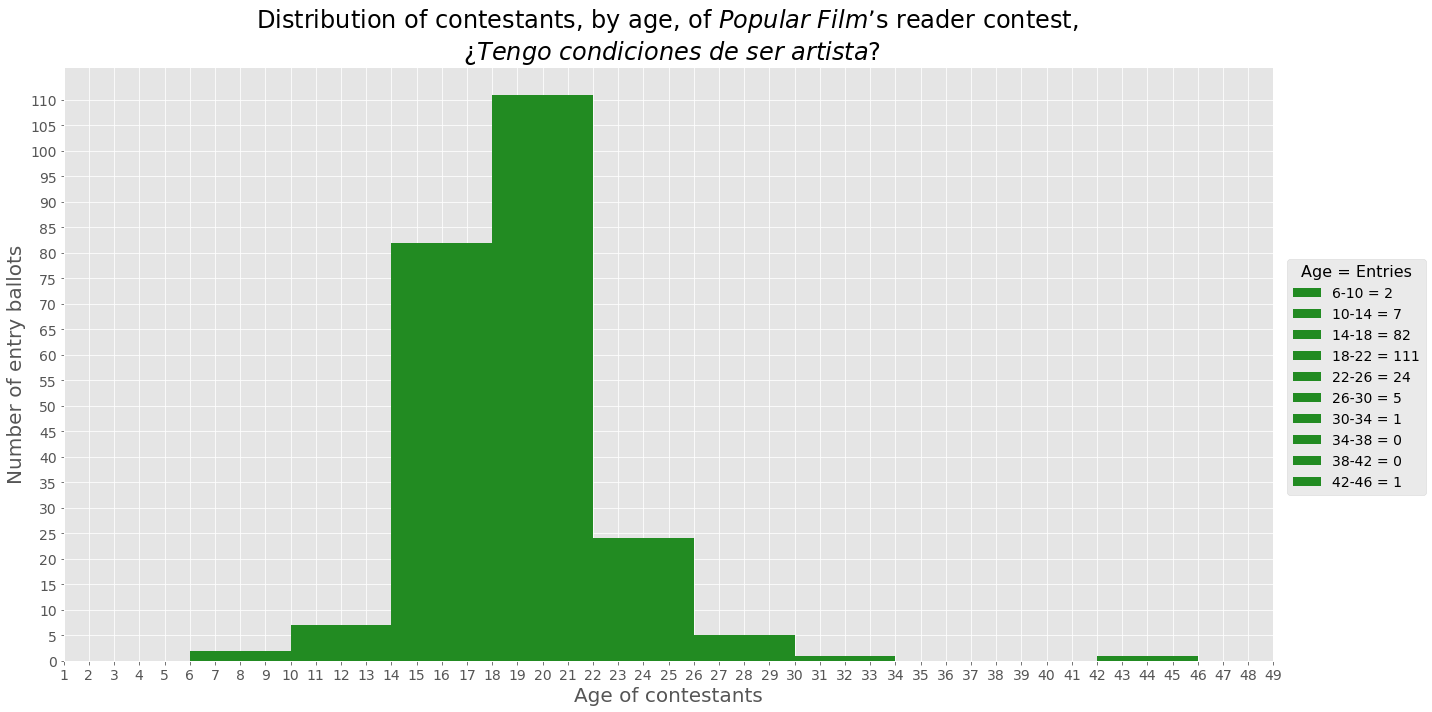

In [91]:
fig = plt.figure(figsize=(20, 10))
plt.style.use('ggplot')
counts, bins, bars = plt.hist(df_photos['Age'], bins=10, color='forestgreen')

legend_dict = {}
bins = [round(x) for x in list(bins)]
for i in range(len(bins)-1):
    string = str(bins[i]) + '-' + str(bins[i+1])
    legend_dict[string] = counts[i]
    
labels_age = [str(key) + ' = ' + str(int(value)) for key, value in legend_dict.items()]


plt.title('Distribution of contestants, by age, of $\it{Popular}$ $\it{Film’}$s reader contest, \n $\it{¿Tengo}$ $\it{condiciones}$ $\it{de}$ $\it{ser}$ $\it{artista}$$\it{?}$', fontsize=24)
plt.ylabel('Number of entry ballots', fontsize=20)
plt.xlabel('Age of contestants', fontsize=20)

plt.legend(handles=(bars),
           labels=(labels_age),
           title="Age = Entries", title_fontsize=16,
           scatterpoints=1,
           bbox_to_anchor=(1, 0.7), loc=2, borderaxespad=1.,
           ncol=1,
           fontsize=14)

plt.xticks(range(1, 50, 1), fontsize=14)
plt.yticks(range(0,int(max(list(legend_dict.values()))),5), fontsize=14)
plt.tight_layout()


plt.savefig('Distribution_of_contestants_by_age.pdf', bbox_inches='tight')
plt.show()

In [92]:
int(max(list(legend_dict.values())))

111

In [93]:
labels_age

['6-10 = 2',
 '10-14 = 7',
 '14-18 = 82',
 '18-22 = 111',
 '22-26 = 24',
 '26-30 = 5',
 '30-34 = 1',
 '34-38 = 0',
 '38-42 = 0',
 '42-46 = 1']

In [94]:
num_of_mails_in_issues = Counter(df_photos['Issue No.'])
num_of_mails_in_issues

Counter({17: 1,
         18: 1,
         20: 1,
         21: 2,
         22: 2,
         23: 9,
         24: 9,
         25: 9,
         26: 9,
         27: 9,
         28: 9,
         29: 9,
         30: 9,
         31: 9,
         32: 9,
         33: 9,
         34: 9,
         35: 9,
         36: 9,
         37: 9,
         38: 9,
         39: 9,
         40: 16,
         41: 16,
         42: 16,
         43: 16,
         44: 10})

# PLACE

In [95]:
df_estafeta = pd.read_excel('Estafeta.xlsx', engine='openpyxl')
df_estafeta.shape

(1167, 13)

In [96]:
place_df = df_estafeta[['Place']]

for index, row in place_df.iterrows():
    if isinstance(row['Place'], str) == False:
        place_df.drop(index, inplace=True)
        
place_df.shape

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1130, 1)

In [97]:
cities = dict(Counter(place_df['Place']))
cities

{'Ciudad': 112,
 'Bilbao': 16,
 'Not listed': 329,
 'Espulgas Francoli [Tarragona] ': 1,
 'Almería': 6,
 'Madrid': 64,
 'Gijón': 6,
 'Valladolid [assuming Spain, not Mexico] ': 1,
 'Alcanar ': 1,
 'Igualada': 2,
 'Vigo': 3,
 'Palma de Mallorca': 6,
 'Zaragoza': 19,
 'Larache': 7,
 'Valladolid': 22,
 'Cartagena': 6,
 'Santa Cruz de Tenerife': 2,
 'Huesca': 8,
 'Valencia': 44,
 'Cambre': 2,
 'San Sebastián ': 3,
 'Málaga': 37,
 'Lérida': 9,
 'Tetuán [assuming Morroco, not neighborhood of Madrid] ': 1,
 'Alcoy': 4,
 'Lorca': 4,
 'Baracaldo': 1,
 'Alcanar': 2,
 'Trubia': 1,
 'Hospitalet de Llobregat': 2,
 'Santander': 10,
 'Villanueva y Geltrú': 3,
 'Barcelona': 2,
 'Madrid ': 1,
 'Las Palmas': 11,
 'Ginebra (Suiza) [Geneva, Swiss.] ': 1,
 'Alicante': 12,
 'Benejúzar (Alicante)': 1,
 'Oviedo': 2,
 'Algeciras': 3,
 'Tarragona': 16,
 'San Feliu de Guixols': 8,
 'Tánger [Morroco] ': 1,
 'Premiá de Mar ': 1,
 'Vitoria': 5,
 'Casas Ibáñez': 1,
 'Melilla': 11,
 'Rambla, 43, Igualada': 1,
 'Verga

In [100]:
cities_df = pd.DataFrame.from_dict({'City' : list(cities.keys()), 'Count':list(cities.values()), 
                                    'Latitude':'', 'Longitude': ''})
cities_df

,City,Count,Latitude,Longitude
0,Ciudad,112,,
1,Bilbao,16,,
2,Not listed,329,,
3,Espulgas Francoli [Tarragona],1,,
4,Almería,6,,
...,...,...,...,...
188,Villareal,1,,
189,Las Palmas (Canarias),1,,
190,Suria,1,,
191,Sitges,1,,


In [101]:
for index, row in cities_df.iterrows():
    cities_df.at[index,'Latitude'] = np.nan
cities_df

,City,Count,Latitude,Longitude
0,Ciudad,112,NaN,
1,Bilbao,16,NaN,
2,Not listed,329,NaN,
3,Espulgas Francoli [Tarragona],1,NaN,
4,Almería,6,NaN,
...,...,...,...,...
188,Villareal,1,NaN,
189,Las Palmas (Canarias),1,NaN,
190,Suria,1,NaN,
191,Sitges,1,NaN,


In [102]:
for index, row in cities_df.iterrows():
    response = requests.get(url="https://en.wikipedia.org/wiki/{}".format(row['City']))
    response.encoding = 'utf8'
    html = response.text
    soup = BeautifulSoup(html)
    
    if soup.find("span", {"class": "latitude"}):
        latitude = soup.find("span", {"class": "latitude"}).text
        cities_df.at[index,'Latitude'] = latitude
    else:
        cities_df.at[index,'Latitude'] = np.nan
        
    if soup.find("span", {"class": "longitude"}):
        longitude = soup.find("span", {"class": "longitude"}).text
        cities_df.at[index,'Longitude'] = longitude
    else:
        cities_df.at[index,'Longitude'] = np.nan

In [103]:
cities_df

,City,Count,Latitude,Longitude
0,Ciudad,112,NaN,NaN
1,Bilbao,16,43°15′25″N,2°55′25″W
2,Not listed,329,NaN,NaN
3,Espulgas Francoli [Tarragona],1,NaN,NaN
4,Almería,6,36°50′25″N,2°28′05″W
...,...,...,...,...
188,Villareal,1,39°56′16″N,0°6′5″W
189,Las Palmas (Canarias),1,NaN,NaN
190,Suria,1,NaN,NaN
191,Sitges,1,41°14′13″N,1°49′23″E


In [104]:
for index, row in cities_df.iterrows():
    if row['Count']<=3:
        cities_df.at[index,'Weight'] = 10
        cities_df.at[index,'Comment'] = 'Weight = 10, letters < 3'

    if 3<row['Count']<=6:
        cities_df.at[index,'Weight'] = 15
        cities_df.at[index,'Comment'] = 'Weight = 15, letters 3 ~ 6'

    if 6<row['Count']<=12:
        cities_df.at[index,'Weight'] = 20
        cities_df.at[index,'Comment'] = 'Weight = 20, letters 6 ~ 12'

    if 12<row['Count']<=24:
        cities_df.at[index,'Weight'] = 25
        cities_df.at[index,'Comment'] = 'Weight = 25, letters 12 ~ 24'

    if 24<row['Count']<=48:
        cities_df.at[index,'Weight'] = 30
        cities_df.at[index,'Comment'] = 'Weight = 30, letters 24 ~ 48'

    if row['Count']>48:
        cities_df.at[index,'Weight'] = 35
        cities_df.at[index,'Comment'] = 'Weight = 35, letters > 48'

In [105]:
cities_df.to_csv('Coordinates_to_finish.csv')

In [106]:
cities_df_new = cities_df
for index, row in cities_df_new.iterrows():
    if isinstance(row['Latitude'], str) == False:
        cities_df_new.drop(index, inplace=True)

cities_df_new.shape

(114, 6)

In [107]:
cities_df_new.to_csv('Coordinates.csv')